In [0]:
import numpy as np

from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Downloads all images from a Google Images page

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Creates n subdirectories that contain the n different classes

In [0]:
folders = ['albatross','blue_duck','kaka','kakapo','kea','kereru','kiwi',
           'morepork','paradise_duck','pukeho','takahe','tui','wax_eye','weka','yellowhead']

url_files = ['albatross.txt','blue_duck.txt','kaka.txt','kakapo.txt','kea.txt','kereru.txt','kiwi.txt',
           'morepork.txt','paradise_duck.txt','pukeho.txt','takahe.txt','tui.txt','wax_eye.txt','weka.txt','yellowhead.txt']

path = Path('data/birds')

for folder in folders:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

Download images via urls in url_files

In [0]:
url_path = Path('/content/gdrive/My Drive/Colab Notebooks/image_classifier/bird_urls')
for f,c in zip(url_files,folders):
  download_images(url_path/f, path/c, max_pics=500)

Remove corrupted or broken images

In [0]:
for folder in folders:
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

albatross


blue_duck


kaka


kakapo


kea


kereru


kiwi


morepork


paradise_duck


pukeho


takahe


tui


wax_eye


weka


yellowhead


Import images into DataBunch object

In [0]:
np.random.seed(42)
images = ImageDataBunch.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224, 
                                  num_workers=4
                                  ).normalize(imagenet_stats)

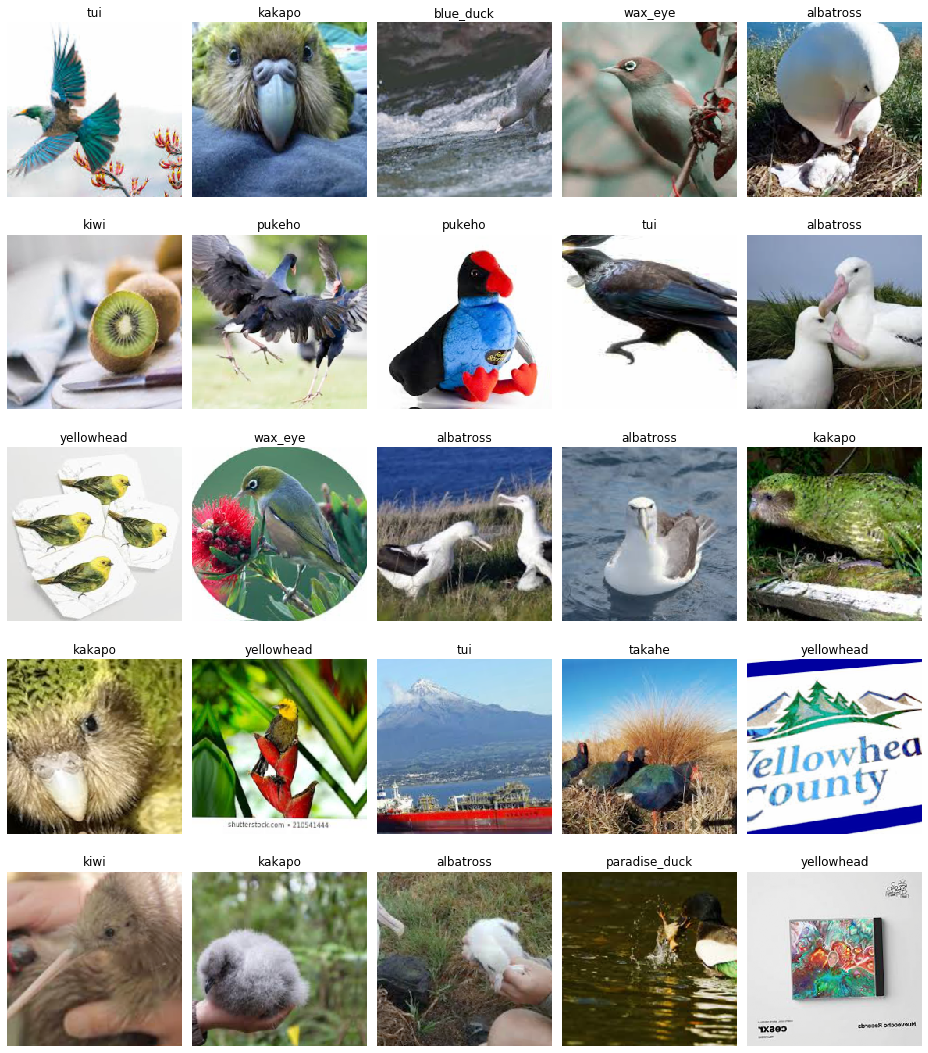

In [0]:
images.show_batch(rows=5, figsize=(13,15))

In [0]:
images.classes, images.c, len(images.train_ds), len(images.valid_ds)

(['albatross',
  'blue_duck',
  'kaka',
  'kakapo',
  'kea',
  'kereru',
  'kiwi',
  'morepork',
  'paradise_duck',
  'pukeho',
  'takahe',
  'tui',
  'wax_eye',
  'weka',
  'yellowhead'],
 15,
 960,
 240)

## The Model
Fit & train the model


In [0]:
model = cnn_learner(images, models.resnet34, metrics=error_rate)
model.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 196MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.127046,0.883615,0.283333,00:11
1,1.822041,0.714944,0.179167,00:11
2,1.256725,0.647405,0.145833,00:11
3,0.940903,0.642557,0.154167,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


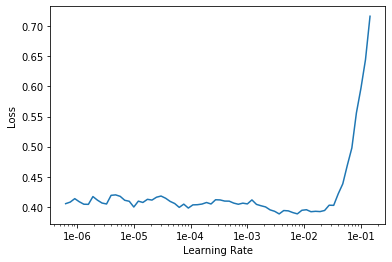

In [0]:
model.lr_find()
model.recorder.plot()

In [0]:
model.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.376704,0.692898,0.166667,00:11
1,0.386640,0.870940,0.216667,00:11
2,0.404841,0.722030,0.187500,00:11
3,0.353349,0.664613,0.195833,00:11


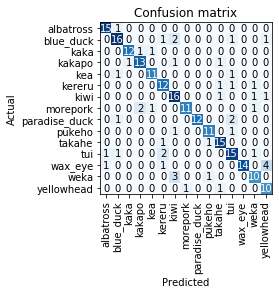

In [0]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)
ImageCleaner(ds, idxs, path, duplicates=True)

## Export for Production

In [0]:
model.export(url_path/'export.pkl')